# Part I - (Ford GoBike System Data)
## by (Oluwaseun Bello)

## Outline of Project
1. Importing Packages


2. Gathering Data



3. Accessing Data, Cleaning & Storing Data


4. Exploratory Data Analysis
- A. Univariate Relationships
- B. Bivariate Relationshsips
- C. Multivariate Relationsips


5. Explanatory Data Analysis



## 1. Importing Packages


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 2. Gathering Data


I will be analyzing the Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset was provided by Udacity for this project.

I have downloaded the dataset and I will read the dataset into a dataframe

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# I want to check how the dataset looks briefly

df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


Time to do a bit of accessment to know the general structure and information of our dataset

In [6]:
df.shape

(183412, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> My dataset has 183412 rows and 16 columns. The dataset generally shows the duration of the trip, the start and end station id's & longitude and latitude.
The type of user and the gender are also noted.
We have some quantitative data, the ID's should all be treated as nominal data (qualitative data). The longitude and latitude can be treated as numeric data for the purpose for any calculations.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out the following:
- Which features influence the trip duration the most
- Which days do customers start and end trips the most?
- Does the user type influence the duration of the trip?
- Which stations have the most trip counts in our dataset?
- The relationship between the distance of trips traveled and the customer type & cutomer age.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- duration_sec
- start and end time
- user_type
- start & end station latitude and longitude.
- member birth year and gender
- start and end station name

> 

## 3. Access, Cleaning and Storing Data

#### Accessing & Cleaning
> We need to accesss the data for quality and tidiness issues

> Quality issues to be checked and cleaned :
- Invalid data
- Missing data
- Inaccurate data
- Inconsistent data

Below is the code that accesses and cleans the df 

In [18]:
df_c = df.copy()

Invalid data types need to be changed

In [12]:
df_c.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [14]:
df_c.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [19]:
df_c['end_time'] = pd.to_datetime(df_c['end_time'])
df_c['start_time'] = pd.to_datetime(df_c['start_time'])
df_c['start_station_id'] = df_c['start_station_id'].astype('object')
df_c['end_station_id'] = df_c['end_station_id'].astype('object')
df_c['bike_id'] = df_c['bike_id'].astype('object')
df_c['member_birth_year'] = df_c['member_birth_year'].astype('Int64')
df_c['user_type'] = df_c['user_type'].astype(pd.api.types.CategoricalDtype(ordered = False, categories = ['Customer','Subscriber']))
df_c['member_gender'] = df_c['member_gender'].astype(pd.api.types.CategoricalDtype(ordered = False, categories = ['Male', 'Female', 'Other']))

In [21]:
df_c.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No


Based on the kinds of analysis I envision, I will need to do some additional wrangling.

Firstly, I want to try to use haversine formula to calculate the distance between two points on the earth surface given their latitude and longitude
The formula was obtained from https://www.omnicalculator.com/other/latitude-longitude-distance

In [23]:
import math
 
def distance(origin, destination):
 
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
 
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
 
    return d
 
  

now lets apply the function to the df to get the distance in km between our start and end locations

In [28]:
df_c['distance'] = 0

In [78]:
df_v = df_c.copy() 

In [79]:
for i in np.arange(0, 183412):
    origin = (df_v.start_station_latitude[i],df_v.start_station_longitude[i])
    destination = (df_v.end_station_latitude[i],df_v.end_station_longitude[i])
    a = distance(origin, destination) 
    df_v['distance'][i] = a

<ipython-input-79-f34b2e7d5a1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v['distance'][i] = a


In [80]:
df_v.distance.describe()

count    183412.000000
mean          1.189617
std           1.133560
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          69.000000
Name: distance, dtype: float64

In [81]:
df_v.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,No,1
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2


Lets perform some additional wrangling that will aid in getting the analysis we desire.
I will like to get the following:
> Duration of the trip in mins.
> The start and end date, hour, day and month 
> The member age as at 2019
> Member age groups (below 20, 21-40, 41-60, above 60)

In [82]:
# but first lets creat a copy to keep our new km added dataset

df_v1 = df_v.copy()

In [83]:
df_v1['duration_min'] = df_v1['duration_sec']/60

df_v1['start_date'] = df_v1['start_time'].dt.date
df_v1['end_date'] = df_v1['end_time'].dt.date
df_v1['start_hour'] = df_v1['start_time'].dt.hour
df_v1['start_dow']  = df_v1['start_time'].dt.dayofweek
df_v1['start_day'] = df_v1['start_time'].dt.day
df_v1['start_month'] = df_v1['start_time'].dt.month

df_v1['member_age'] = (2019 - df_v1['member_birth_year']).astype('Int64')


lets drop all empty and Nan rows before we do the member category analysis

In [85]:
df_v1.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
distance                      0
duration_min                  0
start_date                    0
end_date                      0
start_hour                    0
start_dow                     0
start_day                     0
start_month                   0
member_age                 8265
dtype: int64

In [87]:
df_v1.dropna(axis = 0, inplace = True)

In [92]:
df_v1.duplicated().sum()

0

In [93]:
df_v2 = df_v1.copy()

Now we can conveniently add a member category

In [94]:
df_v2['member_age_category'] = df_v2['member_age'].apply(lambda x: 'Below 20' if x<=20
                                                               else '21 - 40' if 20<x<=40
                                                               else '41 - 60' if 40<x<=60
                                                               else 'Above 60')

In [95]:
df_v2.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,distance,duration_min,start_date,end_date,start_hour,start_dow,start_day,start_month,member_age,member_age_category
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,0,869.750000,2019-02-28,2019-03-01,17,3,28,2,35,21 - 40
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2,1030.900000,2019-02-28,2019-03-01,12,3,28,2,47,41 - 60
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,0,608.166667,2019-02-28,2019-03-01,17,3,28,2,30,21 - 40
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,2,26.416667,2019-02-28,2019-03-01,23,3,28,2,45,41 - 60


we can now drop columns that are not necessary for analysis 

In [96]:
df_v2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance', 'duration_min', 'start_date', 'end_date', 'start_hour',
       'start_dow', 'start_day', 'start_month', 'member_age',
       'member_age_category'],
      dtype='object')

In [98]:
df_v2.drop(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'member_birth_year'], axis=1, inplace = True)

In [100]:
df_v2.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'user_type', 'member_gender', 'distance', 'duration_min', 'start_date',
       'end_date', 'start_hour', 'start_dow', 'start_day', 'start_month',
       'member_age', 'member_age_category'],
      dtype='object')

### Lets store our dataset!

In [111]:
df_v2.to_csv('final_ford_data.csv', index = False)

Okay, now we are all set for exploration!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



#### Lets see the distribution of the trip duration in minutes

In [102]:
df_v2.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

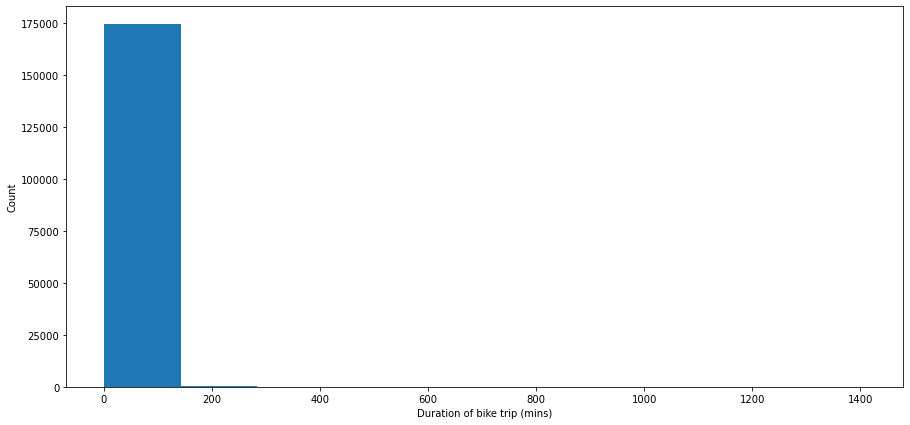

In [113]:
plt.figure(figsize = [15, 7])
plt.hist(data = df_v2, x = 'duration_min');
plt.xlabel('Duration of bike trip (mins)');
plt.ylabel('Count');

As expected, there are outliers in the plot. For example the max value is 1409.13333 mins while the mean is 11.7 mins 
This shows a great difference.
We should instead plot for the points where most dataset lie, to obtain reliable plots.
We can plot  from 0 to 50 mins

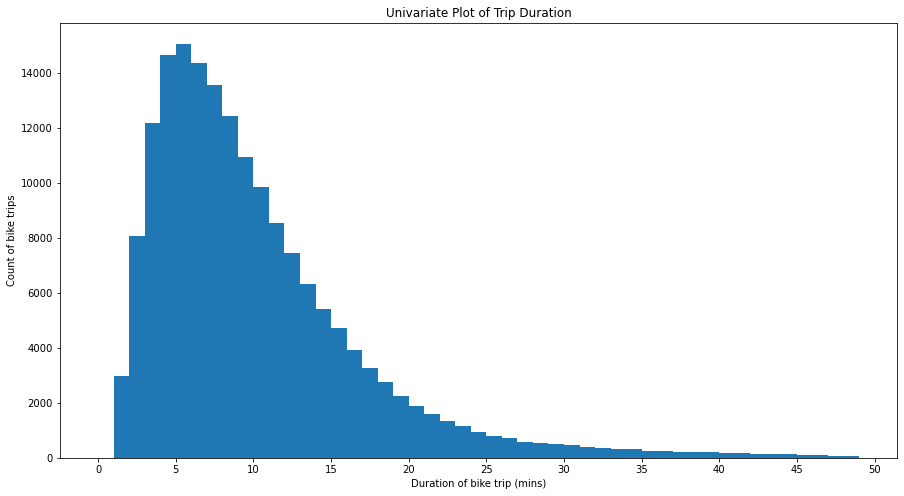

In [116]:
plt.figure(figsize = [15, 8])
bin_edges = np.arange(0, 50, 1)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(x) for x in ticks]

plt.hist(data = df_v2, x = 'duration_min', bins = bin_edges);
plt.title('Univariate Plot of Trip Duration');
plt.xlabel('Duration of bike trip (mins)');
plt.ylabel('Count of bike trips');
plt.xticks(ticks, labels);

We immediately observe that most of the data falls between 1- 15mins

It is obvious that this data is right skewed and we can use a log transform to convert the 
plot to a normal distribution

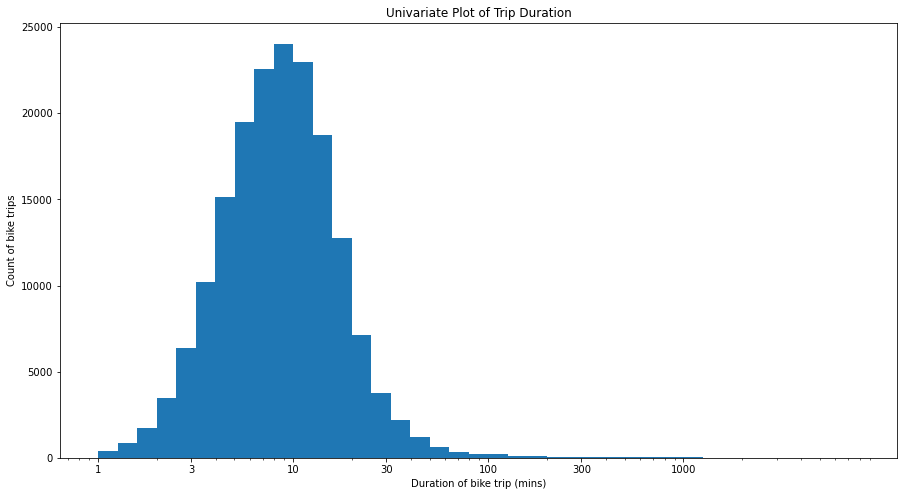

In [124]:
plt.figure(figsize = [15, 8])
bins = 10 ** np.arange(0, 3.0+1, 0.1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(x) for x in ticks]
plt.hist(data = df_v2, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Univariate Plot of Trip Duration');
plt.xlabel('Duration of bike trip (mins)');
plt.ylabel('Count of bike trips');


This plot gives a better distribution and shows the peak of the trip count at 10mins. The number of trips count counts starts around 500, peaks at about 24000 and drops to around 100.

#### Lets see the distribution of the trips in terms of the distance traveled

In [139]:
df_v2.distance.describe()

count    174952.000000
mean          1.188617
std           1.134120
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          69.000000
Name: distance, dtype: float64

I can already predict there are outliers in the data since 75% of the data is less 
than 2 and the mean is 1.18 while the max is as large as 69. We should just plot
for the reasonable plots up to 3

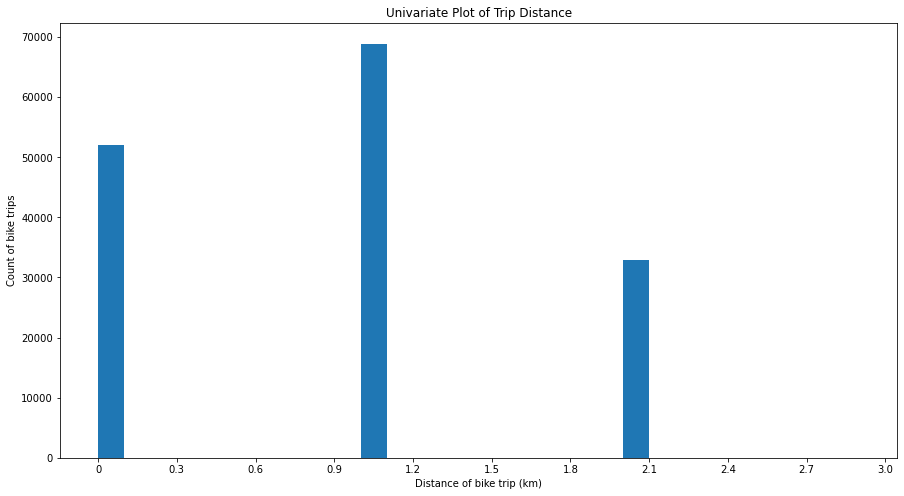

In [140]:
plt.figure(figsize = [15, 8])
bin_edges = np.arange(0, 3.0, 0.1)
ticks = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]
labels = ['{}'.format(x) for x in ticks]

plt.hist(data = df_v2, x = 'distance', bins = bin_edges);
plt.title('Univariate Plot of Trip Distance');
plt.xlabel('Distance of bike trip (km)');
plt.ylabel('Count of bike trips');
plt.xticks(ticks, labels);

the distributions seem to be located in 3 bins alone. 

#### Lets see the distribution of the trips in terms of the user type

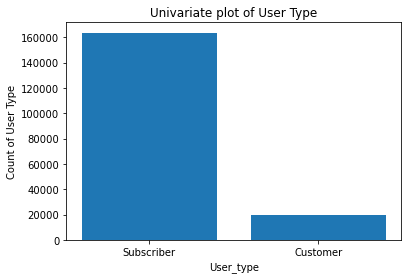

In [151]:
plt.bar(x=df.user_type.value_counts().keys(), height=df.user_type.value_counts());
plt.xlabel('User_type')
plt.ylabel('Count of User Type')
plt.title('Univariate plot of User Type');

It is obvious that there is a great difference between the user types. The majority of the users are subcribers and thats good to know (assuming subscribers have subscriptions and are not one time clients). 

In [129]:
df_v2.start_dow.value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: start_dow, dtype: int64

Where the day of the week with Monday=0, Sunday=6.

In [131]:
start_dow_counts = df_v2.start_dow.value_counts()
type_order = start_dow_counts.index

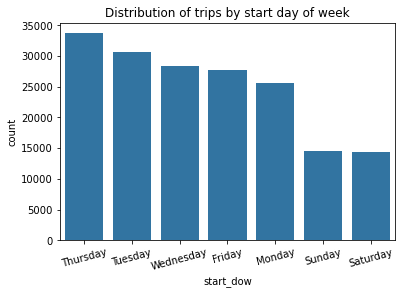

In [138]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_v2, x = 'start_dow', color = base_color, order = type_order);
ticks = [0,1,2,3,4,5,6]
labels = ['Thursday', 'Tuesday', 'Wednesday', 'Friday', 'Monday', 'Sunday', 'Saturday']
plt.xticks(ticks,labels);
plt.xticks(rotation = 15);
plt.title('Distribution of trips by start day of week');

This shows that most trips were taken during the middle of the week especially on Thursdays.
Of particular interest is the fact that the least trips were taken on weekends

#### Lets see the distribution of the trips in terms of the genders

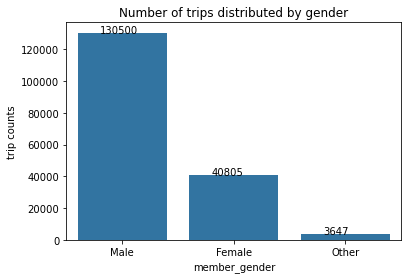

In [156]:
base_color = sb.color_palette()[0];
ax = sb.countplot(x = df_v2['member_gender'], order=df_v2['member_gender'].value_counts().index, color=base_color);

for g, label in zip(ax.patches, df_v2['member_gender'].value_counts()):
    ax.annotate(label, (g.get_x()+0.20, g.get_height()));

plt.title('Number of trips distributed by gender');
plt.ylabel('trip counts');

Wow its interesting to note that Males take far more trips that Females.
This insight is something the company should investigate to drive up the numbers of females.

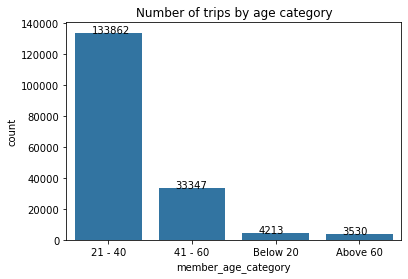

In [159]:
base_color = sb.color_palette()[0];
ax = sb.countplot(x = df_v2['member_age_category'], order=df_v2['member_age_category'].value_counts().index, color=base_color);

for g, label in zip(ax.patches, df_v2['member_age_category'].value_counts()):
    ax.annotate(label, (g.get_x()+0.20, g.get_height()));
    
plt.title('Number of trips by age category');

As expected the highest number of trips is for the age range 21-40.
For Below 20, the count is low mainly beacuse the number of trips for that range is very low complained to the others.
As expectd the elderly people (avove 60) have the lowest count

####  For the duration of trip in minutes:
- There are outliers in the plot. For example the max value is 1409.13333 mins while the mean is 11.7 mins. 

- This shows a great difference and we need to be wary of the outliers.

- We instead plotted for the points where most dataset lie, to obtain reliable plots.

- We can plot  from 0 to 50 mins even though this distribution gave a right skewed hisotgram with the peak of the graph lying to the left.

- A log normal transformation was performed to obtain a normal distribution plot.

####  For the user type:
- It is obvious that there is a great difference between the user types. The majority of the users are subcribers and thats good to know (assuming subscribers have subscriptions and are not one time clients). 

####  For the distribution of the trip by start day of week:

- This shows that most trips were taken during the middle of the week especially on Thursdays. Of particular interest is the fact that the least trips were taken on weekends

####  For the distribution of the trip by age category:

- I had to calculate the age at 2019 from the member  birth year and group them into several groups.  


> The duration of the trips in minutes had unusually high outliers.

> I performed some operations to tidy, adjust and change the form of the dataset. The operations are listed below:
-  Obtained start date, end date, start hour, start day of week, start day, start month using pd.dt. This is to get insghts about the start periods.
- I converted duration in secs to mins, to obtain relatable insights.
- I obtained member age and member age category from the birth year by using 2019 as the current year to get insights about the age category

####  For the distribution of the trip by gender
- Wow its interesting to note that Males take far more trips that Females. This insight is something the company should investigate to drive up the numbers of females.

####  For the distribution of the trip by age category
- As expected the highest number of trips is for the age range 21-40.For Below 20, the count is low mainly beacuse the number of trips for that range is very low complained to the others. As expectd the elderly people (avove 60) have the lowest count

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration). 

### Lets explore the relationship between the duration of bike trips and the user type

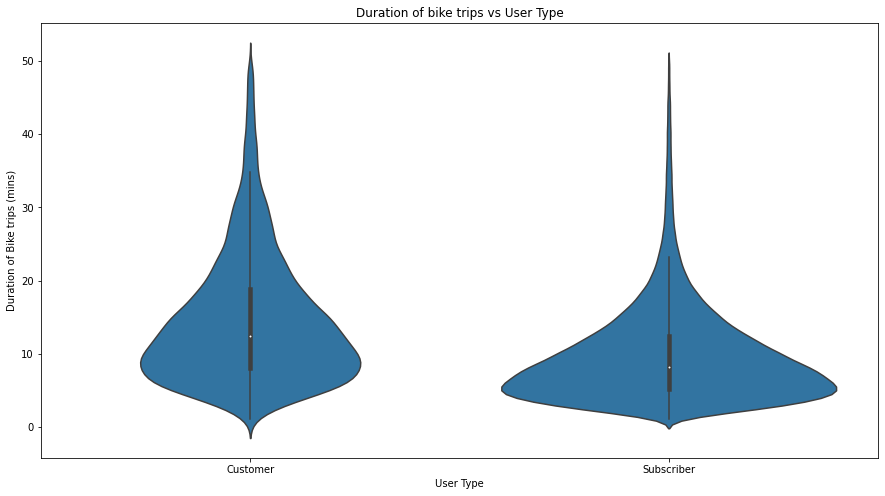

In [162]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])
sb.violinplot(data = df_v2.query('duration_min <= 50'), x = 'user_type', y = 'duration_min', color = base_color)
plt.title('Duration of bike trips vs User Type');
plt.xlabel('User Type');
plt.ylabel('Duration of Bike trips (mins)');

Generally 80% of the trips are below 15 mins. 
Customers tend to have longer bike trip durations than subscribers.
Most customers had trips between 5-15 mins while most subsribers had trips between 2 - 12 mins

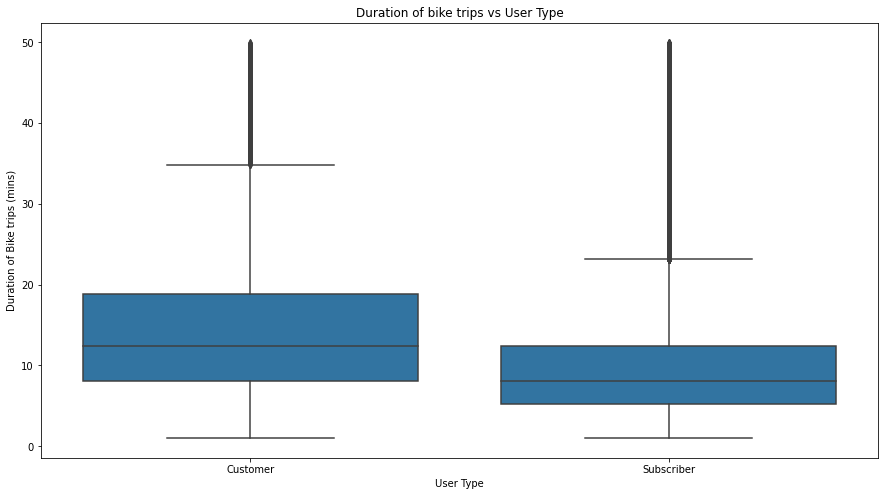

In [163]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])
sb.boxplot(data = df_v2.query('duration_min <= 50'), x = 'user_type', y = 'duration_min', color = base_color)
plt.title('Duration of bike trips vs User Type');
plt.xlabel('User Type');
plt.ylabel('Duration of Bike trips (mins)');

The box plot shows the median displacement between the two plots. 
The customer distribution has a higher median for the duration of trips than the Subsciber distribution.
Its also import to notice that both distributions have a lot of outliers

### Lets explore the relationship between the duration of bike trips and the member age category

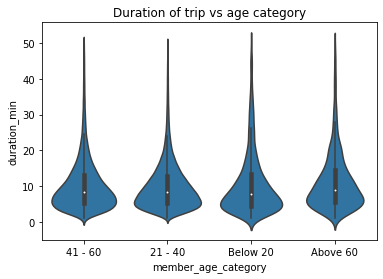

In [165]:
base_color=sb.color_palette()[0]
sb.violinplot(data=df_v2.query('duration_min <=50'), x='member_age_category', y='duration_min', color=base_color);
plt.title('Duration of trip vs age category');

Generally most of the trips are below 15mins.
The '21-40' distribution has the most curve and that is where the bulk of the trips lie.
The above '60' distribution has the smallest curve and that is where the least of the trips lie

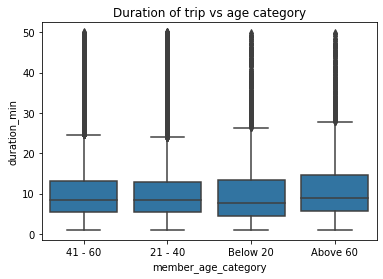

In [182]:
base_color=sb.color_palette()[0]
sb.boxplot(data=df_v2.query('duration_min <=50'), x='member_age_category', y='duration_min', color=base_color);
plt.title('Duration of trip vs age category');

The box plot shows the median displacement between the four plots. 
Unexpectedly, the 'Above 60' distribution has the highest median displacement
Its also import to notice that both distributions have a lot of outliers

In [160]:
df_v2.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'user_type', 'member_gender', 'distance', 'duration_min', 'start_date',
       'end_date', 'start_hour', 'start_dow', 'start_day', 'start_month',
       'member_age', 'member_age_category'],
      dtype='object')

#### The relationship between the duration of bike trips and the user type
> For the violin plot, generally 80% of the trips are below 15 mins. Customers tend to have longer bike trip durations than subscribers. Most customers had trips between 5-15 mins while most subsribers had trips between 2 - 12 mins

> For the box plot shows the median displacement between the two plots. 
The customer distribution has a higher median for the duration of trips than the Subsciber distribution.
Its also import to notice that both distributions have a lot of outliers

#### The relationship between the duration of bike trips and the member age category
> For the violin plot, generally most of the trips are below 15mins.
The '21-40' distribution has the most curve and that is where the bulk of the trips lie.
The above '60' distribution has the smallest curve and that is where the least of the trips lie

> For the box plot, the median displacement between the four plots. 
Unexpectedly, the 'Above 60' distribution has the highest median displacement
Its also import to notice that both distributions have a lot of outliers



## Multivariate Exploration



### Lets explore the relationship between the duration of bike trips, the user type and gender

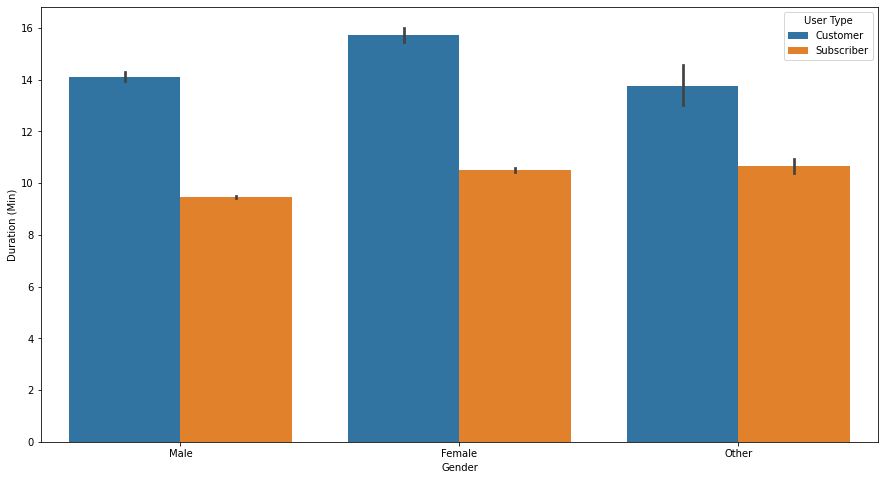

In [189]:
plt.figure(figsize=[15, 8])
sb.barplot(data=df_v2.query('duration_min <=50'), x='member_gender', y='duration_min', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Duration (Min)')
plt.legend(title='User Type');

For all Gender groups the customers have longer trip durations than the subscribers.

### Lets explore the relationship between the duration of bike trips, member age category and the user type

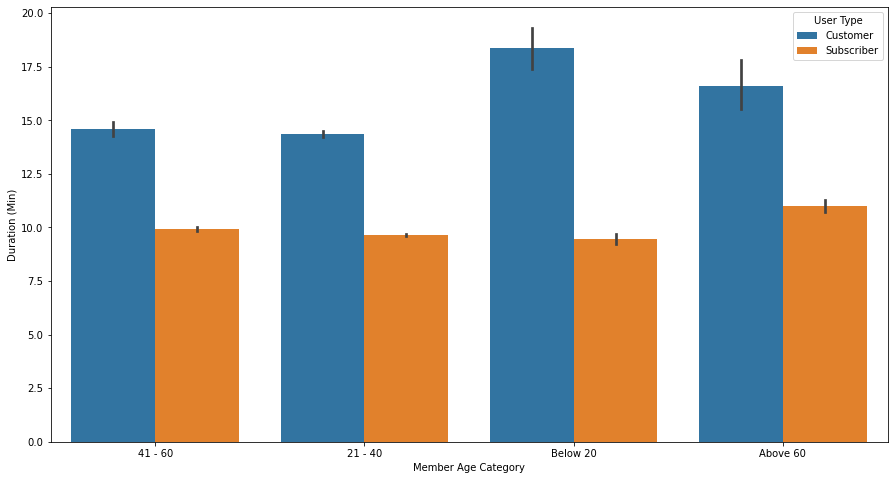

In [190]:
plt.figure(figsize=[15, 8])
sb.barplot(data=df_v2.query('duration_min <=50'), x='member_age_category', y='duration_min', hue='user_type')
plt.xlabel('Member Age Category');
plt.ylabel('Duration (Min)');
plt.legend(title='User Type');

For duration <= 50 mins, 'below 20' Females tend to have the highest trip duration

### Lets explore the relationship between the hour of trip, duration of bike trips and the user type

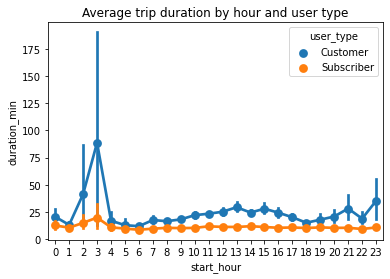

In [171]:
sb.pointplot(data=df_v2, x='start_hour', y='duration_min', hue='user_type');
plt.title('Average trip duration by hour and user type');

Most of the trips were between 2 am to 4 am for customers.
Most of the trips were between 2 am to 4 am for subcribers.

For the relationship between the duration of bike trips, the user type and gender.
> For all gender groups the customers have longer trip durations than the subscribers.

For the relationship between the duration of bike trips, member age category and the user type
> For all gender groups the customers have longer trip durations than the subscribers.

For the relationship between the hour of trip, duration of bike trips and the user type
> Most of the trips were between 2 am to 4 am for customers.
Most of the trips were between 2 am to 4 am for subcribers.

## Conclusions

- It is obvious that there is a great difference between the user types. The majority of the users are subcribers and thats good to know (assuming subscribers have subscriptions and are not one time clients). 

- This shows that most trips were taken during the middle of the week especially on Thursdays. Of particular interest is the fact that the least trips were taken on weekends

- Wow its interesting to note that Males take far more trips that Females. This insight is something the company should investigate to drive up the numbers of females.

- As expected the highest number of trips is for the age range 21-40.For Below 20, the count is low mainly beacuse the number of trips for that range is very low complained to the others. As expectd the elderly people (avove 60) have the lowest count

- For the violin plot, generally 80% of the trips are below 15 mins. Customers tend to have longer bike trip durations than subscribers. Most customers had trips between 5-15 mins while most subsribers had trips between 2 - 12 mins

- For the box plot shows the median displacement between the two plots. The customer distribution has a higher median for the duration of trips than the Subsciber distribution. Its also import to notice that both distributions have a lot of outliers

- generally most of the trips are below 15mins.The '21-40' distribution has the most curve and that is where the bulk of the trips lie.The above '60' distribution has the smallest curve and that is where the least of the trips lie

- The median displacement between the four plots. Unexpectedly, the 'Above 60' distribution has the highest median displacement. Its also import to notice that both distributions have a lot of outliers

- For all gender groups the customers have longer trip durations than the subscribers.

- For all gender groups the customers have longer trip durations than the subscribers.

- Most of the trips were between 2 am to 4 am for customers.Most of the trips were between 2 am to 4 am for subcribers.